In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
train_df = pd.read_csv('../data/raw/captors.csv')

In [5]:
y = train_df["température"]
X = train_df[["pression", "humidité", "occupation_%", "salle", "température_ext"]]


In [6]:
X = pd.get_dummies(X, columns=["salle"], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 score : {r2:.2f}")


Linear Regression Results
MAE : 0.95
RMSE : 1.23
R2 score : 0.94


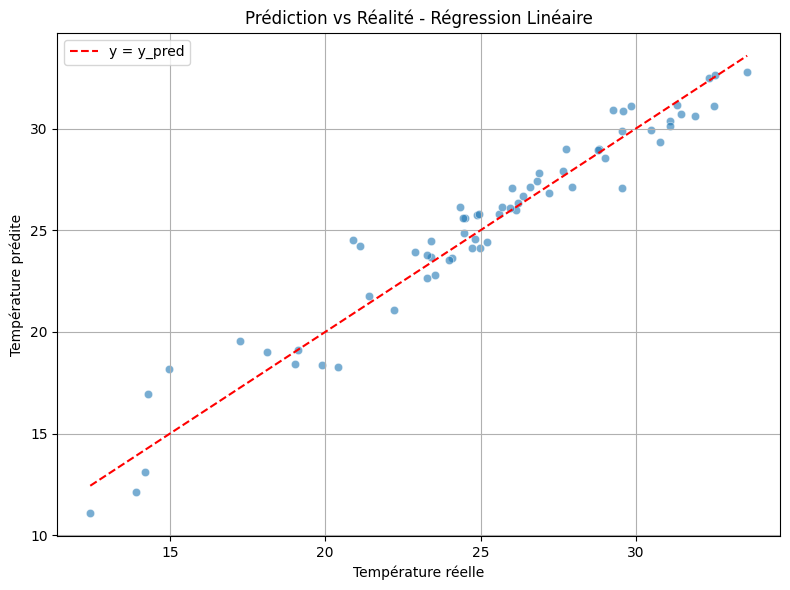

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../output", exist_ok=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    label="y = y_pred",
)

plt.xlabel("Température réelle")
plt.ylabel("Température prédite")
plt.title("Prédiction vs Réalité - Régression Linéaire")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("../output/prediction_vs_reality.png", dpi=300)

plt.show()


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.2f}")


Random Forest Results
MAE  : 0.83
RMSE : 1.12
R²   : 0.95


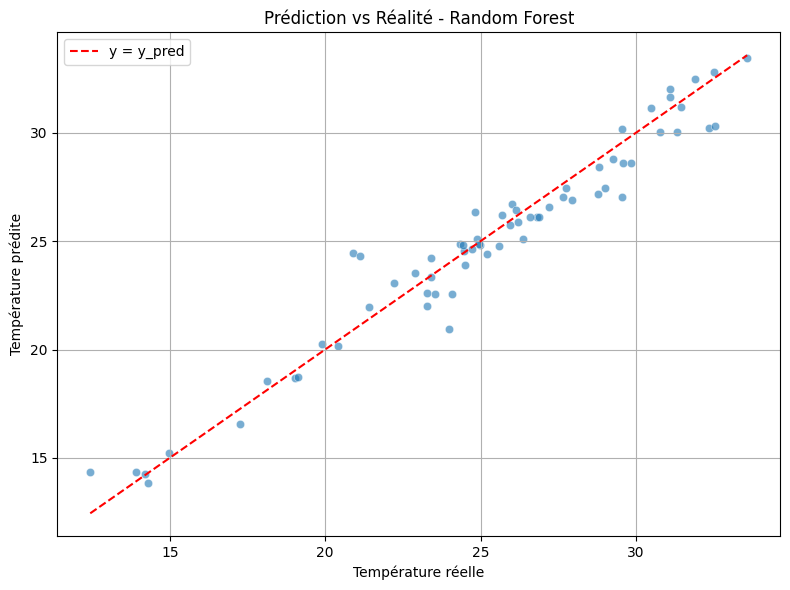

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../output", exist_ok=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    label="y = y_pred",
)

plt.xlabel("Température réelle")
plt.ylabel("Température prédite")
plt.title("Prédiction vs Réalité - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("../output/prediction_vs_reality_rf.png", dpi=300)

plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2,
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max

In [13]:
y_pred_best = best_rf.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R²  :", r2_score(y_test, y_pred_best))


MAE : 0.8158761497178126
RMSE: 1.0827621218321097
R²  : 0.9519426986148289


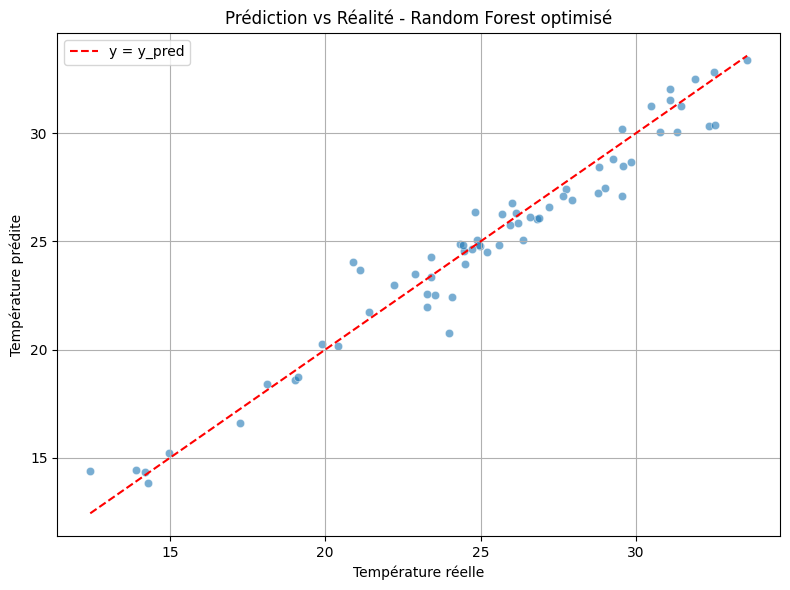

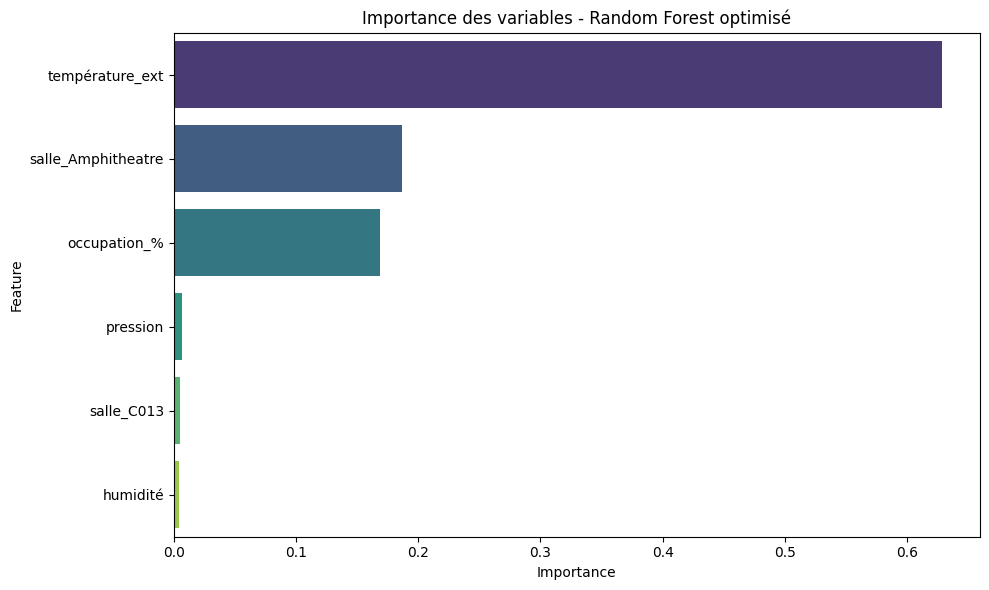

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 1. Graphique Prédiction vs Réalité
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    label="y = y_pred",
)

plt.xlabel("Température réelle")
plt.ylabel("Température prédite")
plt.title("Prédiction vs Réalité - Random Forest optimisé")
plt.legend()
plt.grid(True)
plt.tight_layout()

os.makedirs("../output", exist_ok=True)
plt.savefig("../output/prediction_vs_reality_rf_optim.png", dpi=300)
plt.show()

# 2. Importance des variables
importances = best_rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df,
    palette="viridis",
    hue="Feature",
    dodge=False,
    legend=False,
)
plt.title("Importance des variables - Random Forest optimisé")
plt.tight_layout()
plt.savefig("../output/feature_importance_rf_optim.png", dpi=300)
plt.show()


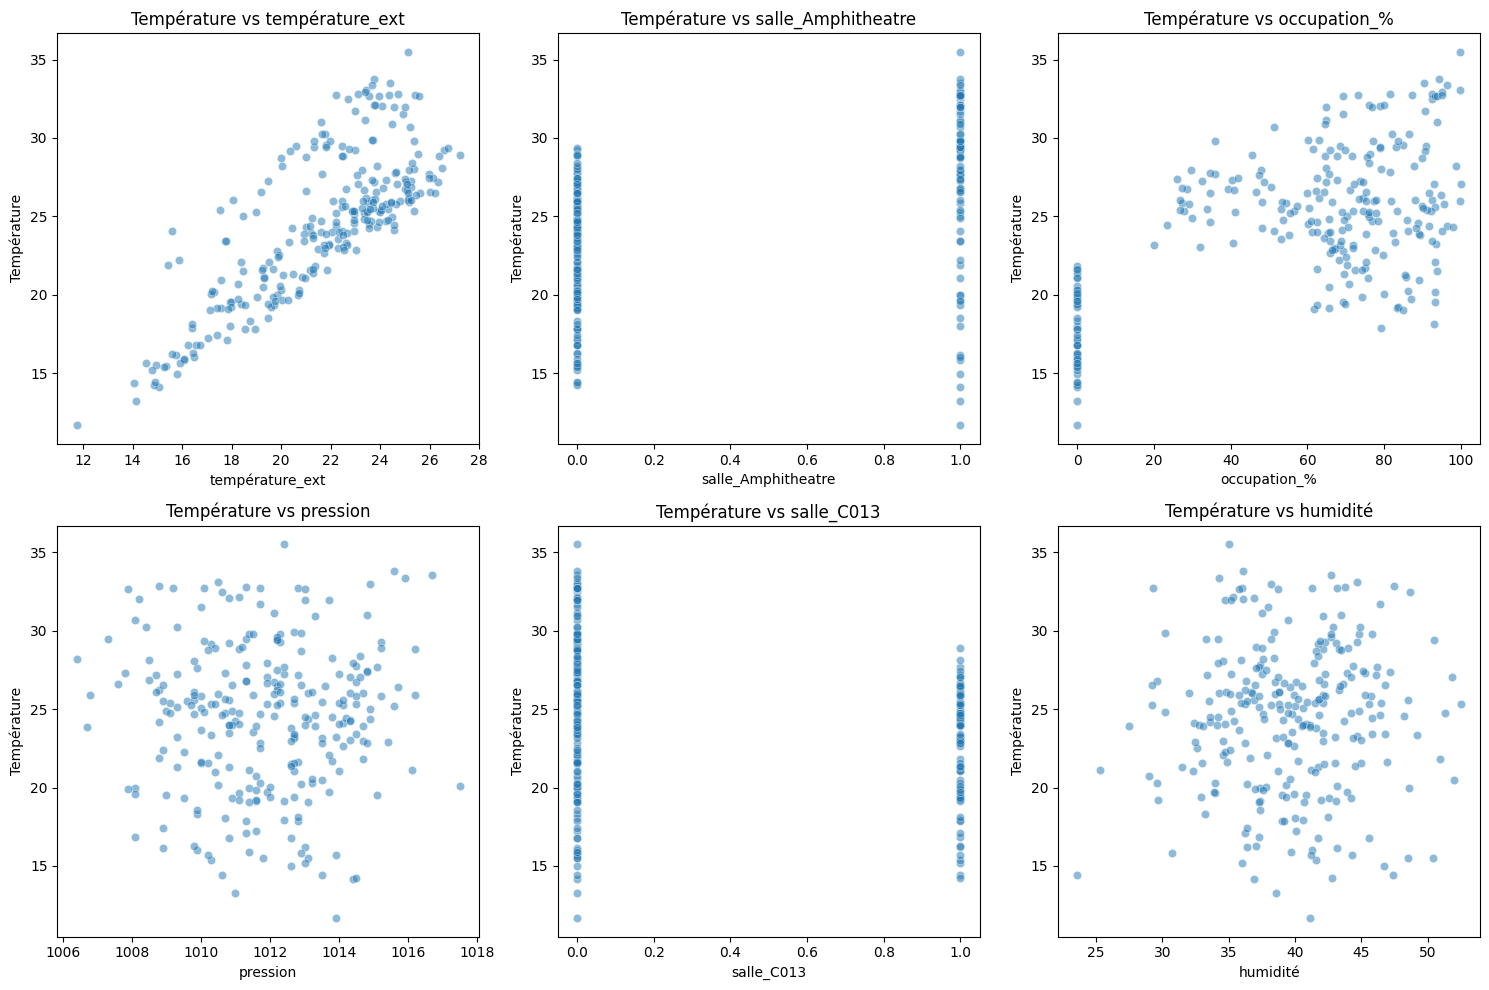

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_check = importance_df["Feature"].tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_check):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Température")
    plt.title(f"Température vs {feature}")
plt.tight_layout()
plt.show()


In [16]:
X_train["occ_temp_ext"] = X_train["occupation_%"] * X_train["température_ext"]
X_test["occ_temp_ext"] = X_test["occupation_%"] * X_test["température_ext"]


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.2f}")


MAE : 0.77
RMSE: 1.05
R²  : 0.96


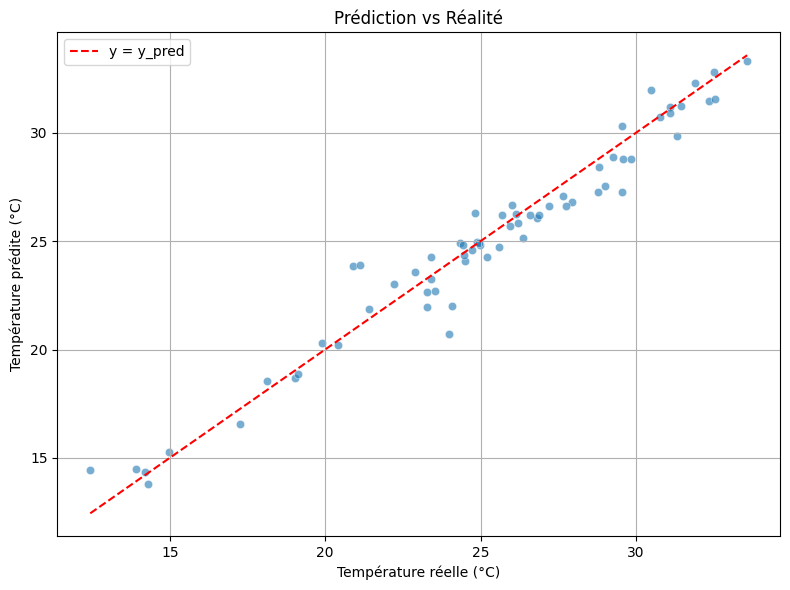

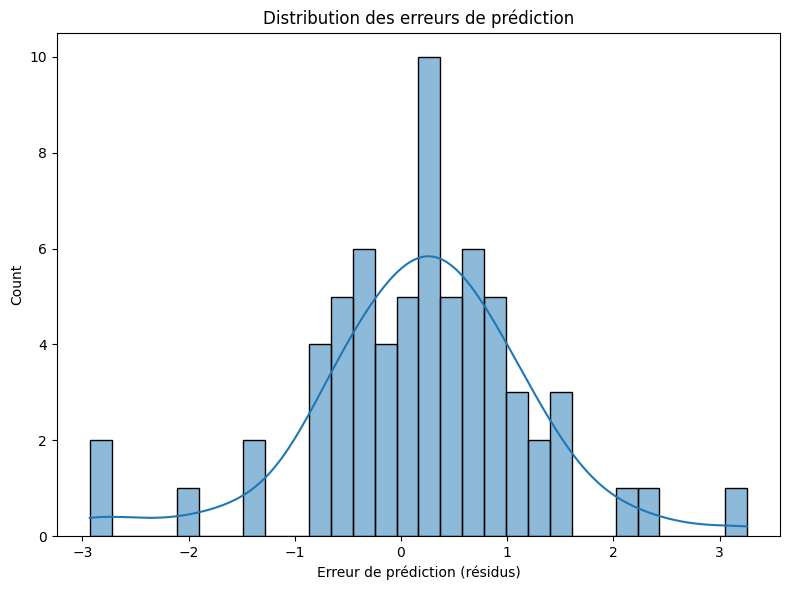

--- Rapport de performance du modèle ---
MAE  : 0.77 °C
RMSE : 1.05 °C
R²   : 0.96
Erreur moyenne absolue faible → modèle précis
R² proche de 1 → modèle explique très bien la variabilité
Distribution résidus centrée autour de 0 → pas de biais systématique


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../output", exist_ok=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    label="y = y_pred",
)
plt.xlabel("Température réelle (°C)")
plt.ylabel("Température prédite (°C)")
plt.title("Prédiction vs Réalité")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../output/prediction_vs_reality.png", dpi=300)
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Erreur de prédiction (résidus)")
plt.title("Distribution des erreurs de prédiction")
plt.tight_layout()
plt.savefig("../output/residuals_distribution.png", dpi=300)
plt.show()

print("--- Rapport de performance du modèle ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f} °C")
print(f"RMSE : {root_mean_squared_error(y_test, y_pred):.2f} °C")
print(f"R²   : {r2_score(y_test, y_pred):.2f}")
print("Erreur moyenne absolue faible → modèle précis")
print("R² proche de 1 → modèle explique très bien la variabilité")
print("Distribution résidus centrée autour de 0 → pas de biais systématique")


In [22]:
import joblib
import os

os.makedirs("../model", exist_ok=True)

joblib.dump(model, "../model/random_forest.pkl")

print("Modèle sauvegardé : 'model/random_forest.pkl'")


Modèle sauvegardé : 'model/random_forest.pkl'
